In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

### Eigendecomposition
Many mathematical objects can be understood better by breaking them into
constituent parts, or finding some properties of them that are universal, not caused
by the way we choose to represent them.

In [2]:
# Eigendecomposition - decompose matrix into eigenvectors and eigenvalues
# Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix

In [3]:
# Can think of matrices as linear transformations
# Some matrices will rotate your space, others will rescale it
# When we apply a matrix to a vector, we end up with a transformed version of the vector
# When we say that we apply the matrix to the vector, it means that we calculate the dot product of the matrix with the vector

In [4]:
A = np.array([
    [-1, 3], 
    [2, -2]
])

v = np.array([[2], [1]])


(-1.0, 4.0)

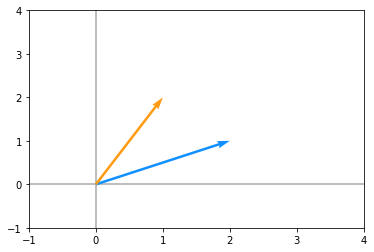

In [5]:
# apply matrix A to vector v
Av = A.dot(v)

plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

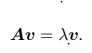

(-1.0, 7.0)

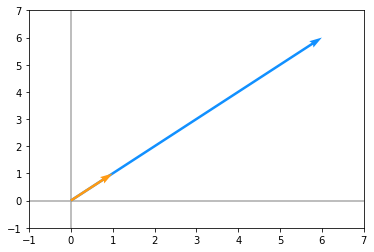

In [6]:
# An eigenvector of a square matrix A is a non-zero vector v such that multiplication by A alters only the scale of v:
# The scalar λ is known as the eigenvalue corresponding to this eigenvector.
# (One can also find a left eigenvector such that vTA = λvT, but we are usually concerned with right eigenvectors).

# imagine that the transformation of the initial vector gives us a new vector that has the exact same direction
# The scale can be different but the direction is the same
# Applying the matrix doesn’t change the direction of the vector. This special vector is called an eigenvector of the matrix.
# Finding the eigenvectors of a matrix can be very useful

# v is an eigenvector of A if c and Av are in the same direction.
# Av is just a scaled version of the input vector.
# Scaling factor is λ - the eigenvalue of A

# Av = λv

# Av is the vector v transformed by matrix A
# this vector is a version scaled by λ of the initial vector v

# we have a matrix
A = np.array([
    [5, 1], 
    [3, 3]
])

# we know that one of eigenvectors of A is v
v = np.array([
    [1], 
    [1]
])

Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)

(-1.0, 3.0)

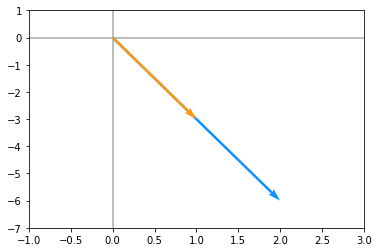

In [7]:
# They have the same direction

# another eigenvector:
v2 = np.array([
    [1],
    [-3]
])

Av2 = A.dot(v2)

plotVectors([Av2.flatten(), v2.flatten()], cols=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

In [8]:
# numpy can return eigenvectors and eigenvalues

In [9]:
print(np.linalg.eig(A))

(array([6., 2.]), array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]]))


(-1.0, 3.0)

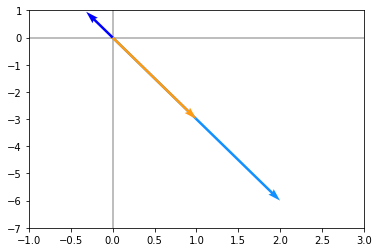

In [10]:
# 6 & 2 are the λ eigenvalues with [ 0.70710678, -0.31622777] & [ 0.70710678,  0.9486833 ] being the corresponding eigenvectors
# The eigenvectors look different because they have not necessarly the same scaling than the ones we gave in the example
# There are an infinite number of eigenvectors corresponding to the eigenvalue 6

v = np.array([[1], [-3]])
Av = A.dot(v)
v_np = [-0.31622777, 0.9486833]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=[blue, orange, 'blue'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

# For the second eigenvector we can check that it corresponds to a scaled version of [1 −3]. We can draw these vectors and see if they have the same direction.
# We can see that the vector found with Numpy (in dark blue) is a scaled version of our preceding [1 −3].

In [11]:
# As we saw it with numpy, if v is an eigenvector of A, then any rescaled vector sv is also an eigenvector of A. 
# The eigenvalue of the rescaled vector is the same.

# i.e. turn [1, -3] ==> [3, -9]
# λ = 2

In [12]:
# Decomposing a matrix using eigenvectors and eigenvalues
# All eigenvectors of a matrix A can be concatenated in a matrix with each column corresponding to each eigenvector

# i.e.
V = np.array([
    [1, 1],
    [1, -3]
])

# where, [1 ] corresponds to λ = 6
#        [1 ]
# and
# where, [1 ] corresponds to λ = 2
#        [-3]

# the vector of lambda values
lambd = np.array([6, 2])

# eigendecomposition is given by:
# A = V . diag(λ) . V-1

In [13]:
diagLambda = np.diag(lambd)

In [14]:
inv_V = np.linalg.inv(V)

In [15]:
V.dot(diagLambda).dot(inv_V)

# which gives us the original matrix A

array([[5., 1.],
       [3., 3.]])

In [16]:
# If a matrix is symmetric:
# eigendecomposition can be done using A = Q/\QT
# where Q = matrix with eigenvectors as columns
# /\ = diag(λ)

In [34]:
A = np.array([
    [6, 2],
    [2, 3]
])

# it is symmetric because A = AT
print(A)
print(A.T)

# finding eigenvalues:
eigen = np.linalg.eig(A)

eig_vectors = np.array([
    [eigen[1][0][0], eigen[1][0][1]],
    [eigen[1][1][0], eigen[1][1][1]]
])
eig_values_diag = np.diag(eigen[0])

# so... Q/\
QinvV = eig_vectors.dot(eig_values_diag)

# then QT
eig_vectorsT = eig_vectors.T

# then just:
QinvV.dot(eig_vectorsT)

# we get back the same matrix!!!

[[6 2]
 [2 3]]
[[6 2]
 [2 3]]


array([[6., 2.],
       [2., 3.]])

In [35]:
# But why use eigendecomposition?????

In [36]:
# it can be used to optimize quadratic functions!
# i.e. when x takes values of eigenvector = some quadratic f(x) will take value of the corresponding eigenvalue

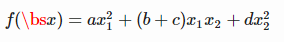

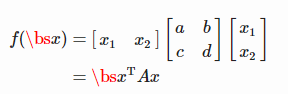

In [37]:
# here, a gives the number of x1^2
# (b + c) gives the number of x1x2
# d gives the number of x2^2
# This means that the same quadratic form can be obtained from infinite number of matrices A
# just need to change b,c while preserving their sum (b + c)

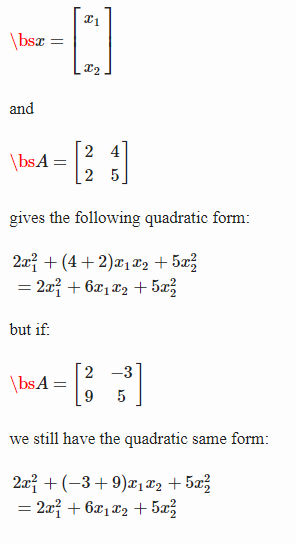

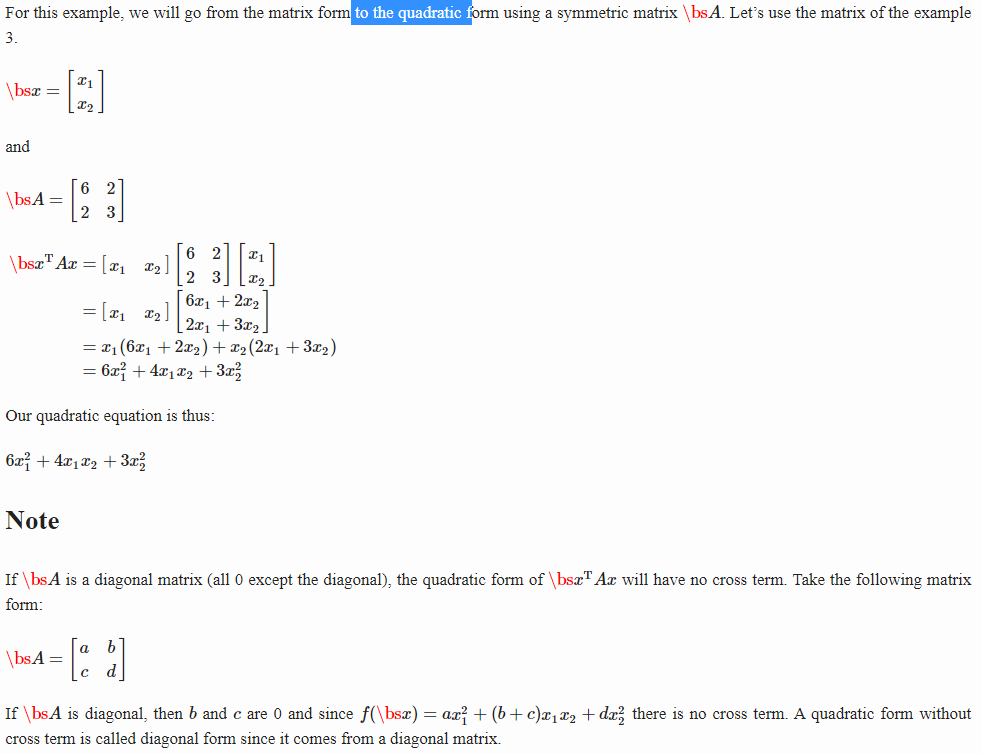

In [38]:
# A change of variable (or linear substitution) simply means that we replace a variable by another one. 
# We will see that it can be used to remove the cross terms in our quadratic equation.
# Without the cross term, it will then be easier to characterize the function and eventually optimize it (i.e finding its maximum or minimum).

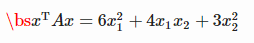

In [39]:
# Here the substitution will take the following form:
# any x1 will be replaced by combination of y1 and y2
# any x2 will be replaced by combination of y1 and y2

# interestingly, we can find a specific substitution that will lead to a simplification of the statement
# specifically can lead to getting rid of the 4x1x2 cross-term

# the right substitution is given by eigenvectors of the matrix used to generate the quadratic form!!!
# x = [x1, x2]

A = np.array([
    [6, 2],
    [2, 3]
])

eigen = np.linalg.eig(A)

print(eigen)
# [ 0.89442719, -0.4472136 ]
# [ 0.4472136,  0.89442719 ]


(array([7., 2.]), array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]]))


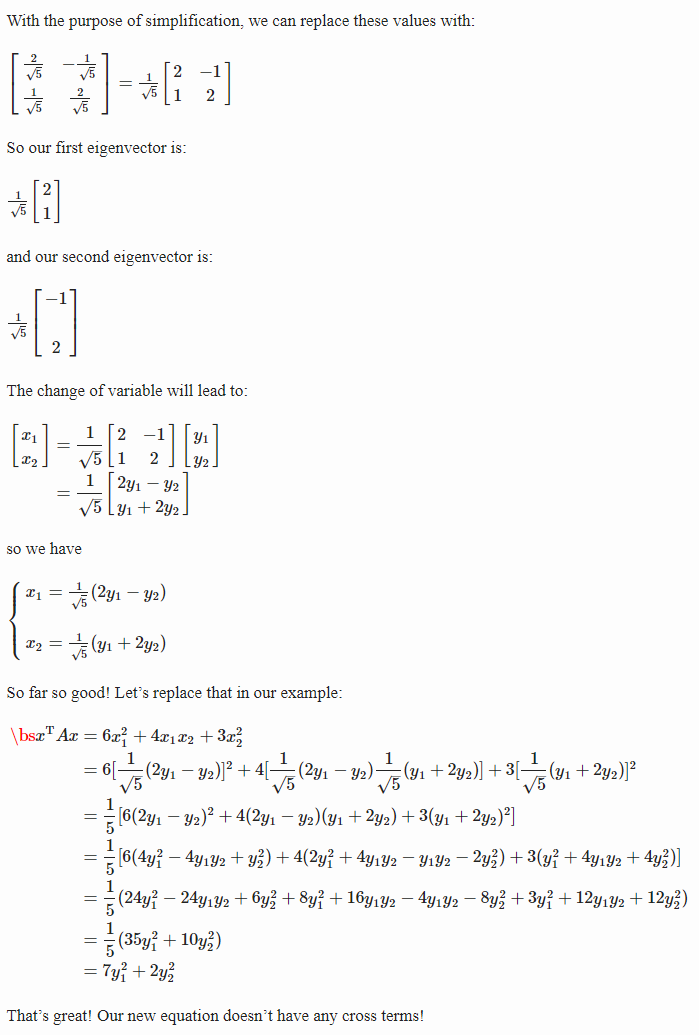

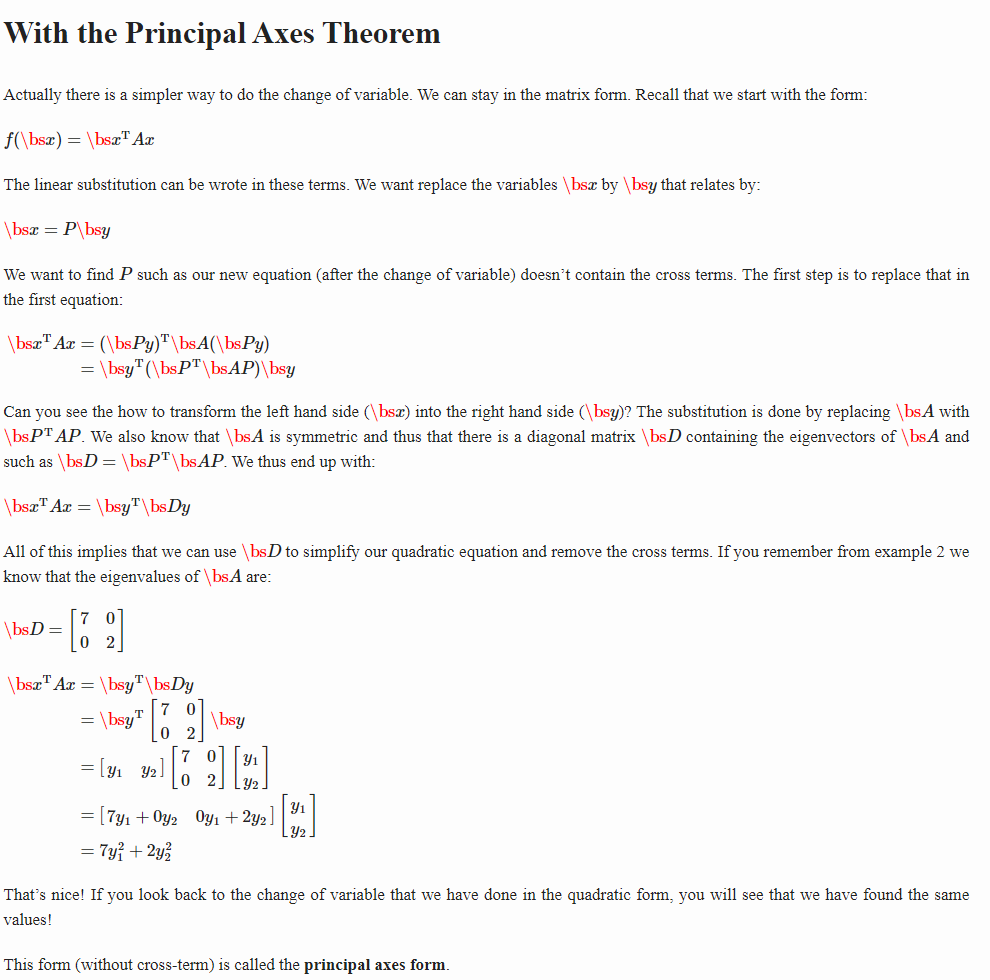

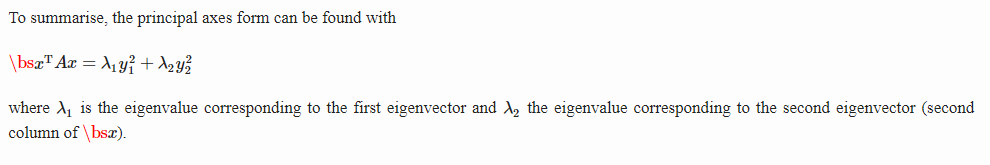

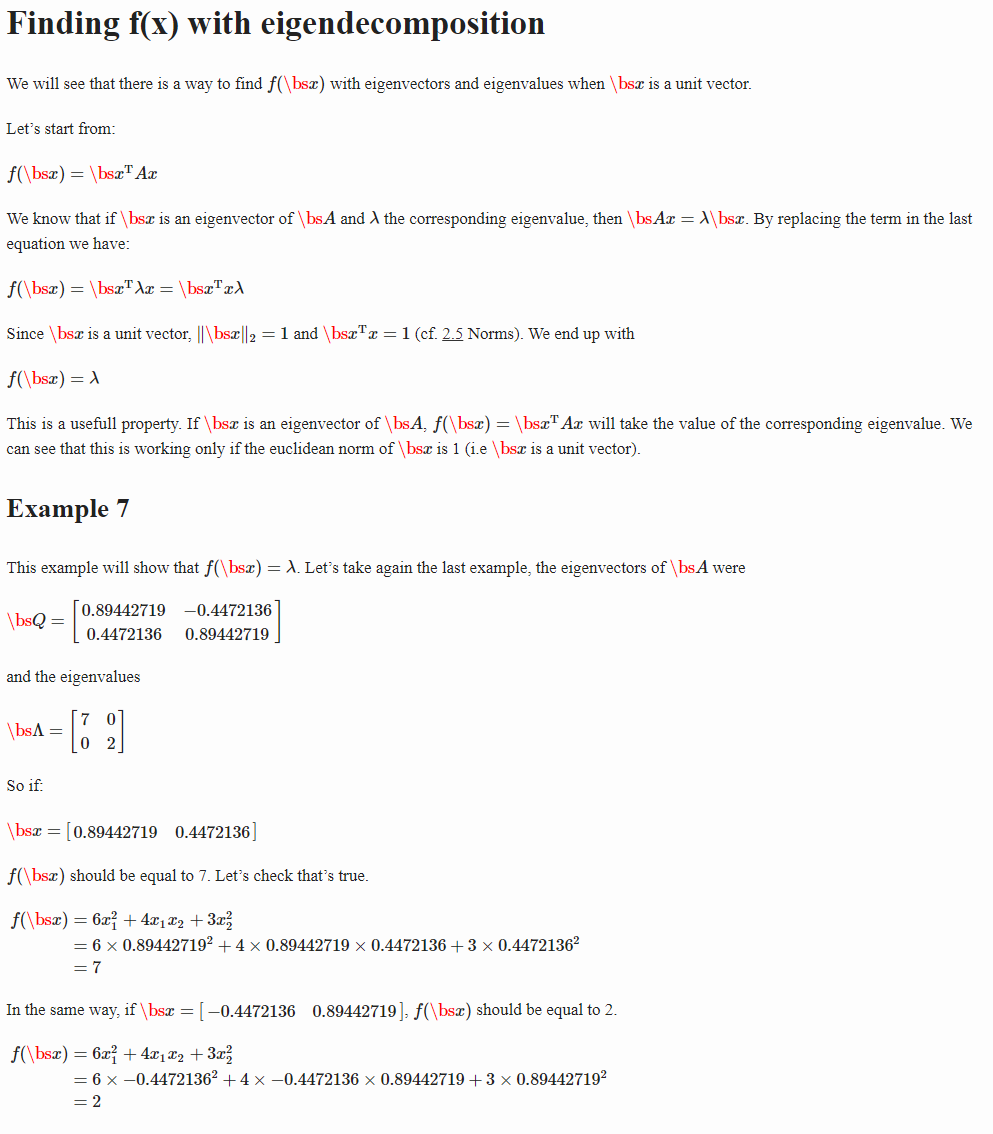

In [47]:
A = np.array([
    [6, 2],
    [2, 3]
])

eigen = np.linalg.eig(A)
evec = eigen[1]
evalues = eigen[0]

# eigenvectors [ 0.89442719, -0.4472136 ]
#              [ 0.4472136,  0.89442719 ]

# eigenvalues = [7, 2]
diag_vals = np.diag(evalues)

def x_function(x):
    x1 = x[0]
    x2 = x[1]
    print(x1, x2)
    return 6 * (x1**2) + 4 * (x1*x2) + 3*(x2**2)

eig_val_1 = x_function([ 0.89442719, 0.4472136 ])
eig_val_2 = x_function([-0.4472136, 0.89442719])
print(eig_val_1, eig_val_2)



0.89442719 0.4472136
-0.4472136 0.89442719
7.000000015653793 2.000000004472512


array([[7., 0.],
       [0., 2.]])

In [48]:
# Quadratic form optimization

# Depending to the context, optimizing a function means finding its maximum or its minimum. 
# It is for instance widely used to minimize the error of cost functions in machine learning.

# We want to optimize


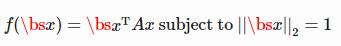

In [49]:
# The function

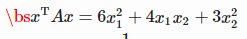

In [50]:
# After simplification (removal of cross-terms) is:

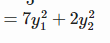

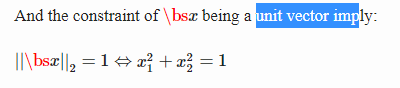

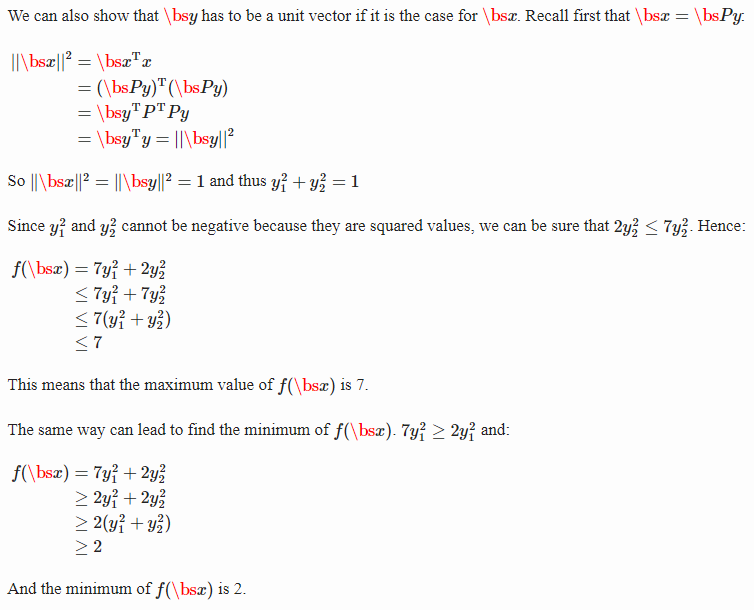

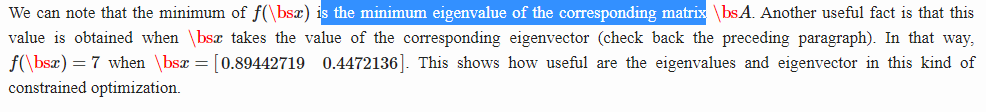

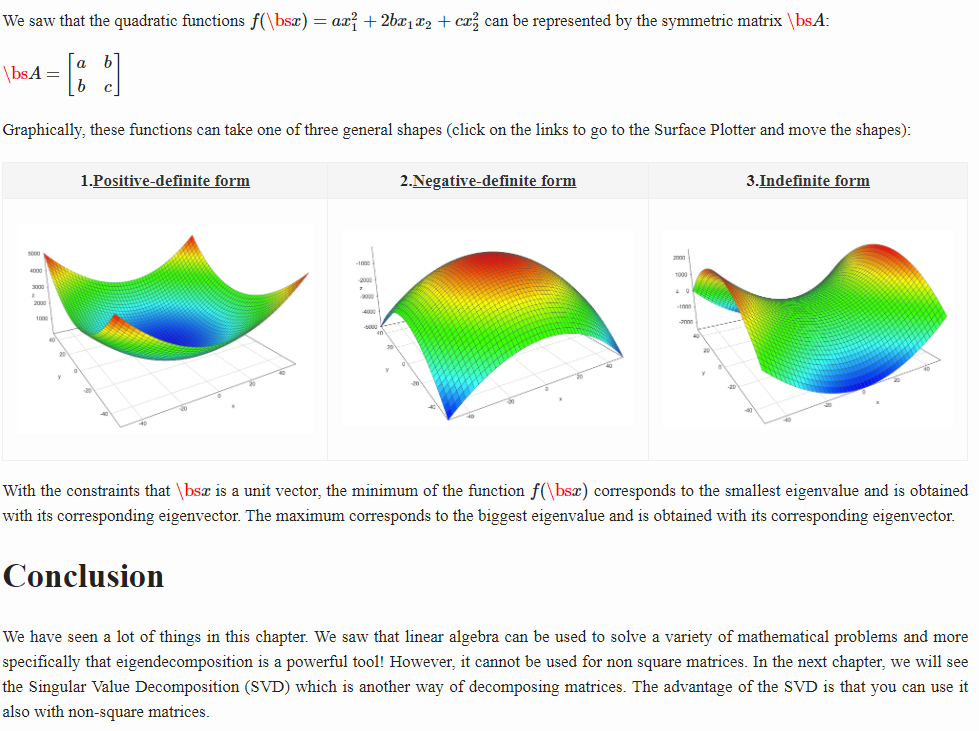

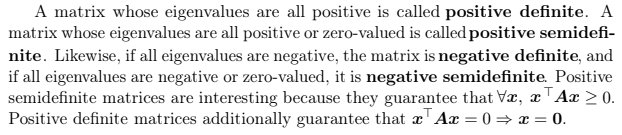